# INTEGRATED USE OF MULTISOURCE REMOTE SENSING DATA FOR NATIONAL SCALE AGRICULTURAL  DROUGHT MONITORING IN KENYA
# ADM-Kenya Workshop, Kenya, May 2024
# Daily Sentinel-3 Land Surfcae Temperature (LSTT Export - High-Resolution Evaportranspiration Estimation

This script provides LST images from 1-km Sentienl-3 SLSTR LST products, which are used in ET estimation.

# Tools and Libraries

We will use the following libraries:

    openEO: A library to initiate using of openEO facility, including various dependencies for processing data collections.
    xarray: A library which simplifies working with labelled multi-dimension arrays
    Matplotlib: A comprehensive library for creating static, animated, and interactive visualizations.

In [1]:
import openeo
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
connection = openeo.connect("openeo.dataspace.copernicus.eu").authenticate_oidc()

Authenticated using refresh token.


Before loading a collection, we need to find out the exact name of a collection we want to use (back-end-specific).
We assign the spatial and temporal extent to variables, so that we can re-use them on other collections we might want to load.

<img src="S3_Fig_1.PNG">

In [3]:
connection.describe_collection("SENTINEL3_SLSTR_L2_LST")

{'cube:dimensions': {'bands': {'type': 'bands',
   'values': ['LST',
    'LST_uncertainty',
    'exception',
    'confidence_in',
    'sunAzimuthAngles',
    'sunZenithAngles',
    'viewAzimuthAngles',
    'viewZenithAngles']},
  't': {'extent': ['2016-04-17T11:33:13Z', None],
   'step': 'P2D',
   'type': 'temporal'},
  'x': {'axis': 'x',
   'extent': [-180, 180],
   'reference_system': 4326,
   'step': 0.008928571428571,
   'type': 'spatial'},
  'y': {'axis': 'y',
   'extent': [-90, 90],
   'reference_system': 4326,
   'step': 0.008928571428571,
   'type': 'spatial'}},
 'description': '*Experimental* Daily global Sentinel-3 land surface temperature at 1km resolution. Land surface temperature is defined as the effective radiometric temperature of the Earth\'s surface "skin" in the instrument field of view. Here, "skin" is referring to the top surface in bare soil conditions and to the effective emitting temperature of vegetation "canopies" as determined from a view of the top of a canopy.\n This product is derived from the SLSTR (Sea and Land Surface Temperature Radiometer) instrument on board the Sentinel-3 satellite.\n\n Multiple observations may be available per day, we recommend temporal aggregation to create daily composites. ',
 'experimental': True,
 'extent': {'spatial': {'bbox': [[-180, -90, 180, 90]]},
  'temporal': {'interval': [['2016-04-17T11:33:13Z', None]]}},
 'id': 'SENTINEL3_SLSTR_L2_LST',
 'keywords': ['COPERNICUS', 'ESA', 'Sentinel-3', 'SLSTR'],
 'license': 'proprietary',
 'links': [{'href': 'https://sentinels.copernicus.eu/documents/247904/690755/Sentinel_Data_Legal_Notice',
   'rel': 'license',
   'type': 'application/pdf'},
  {'href': 'https://documentation.dataspace.copernicus.eu/Data/SentinelMissions/Sentinel3.html#sentinel-3-slstr-level-2',
   'rel': 'alternate',
   'title': 'Data space collection documentation',
   'type': 'application/html'},
  {'href': 'https://sentinels.copernicus.eu/web/sentinel/user-guides/sentinel-3-slstr/processing-levels/level-2',
   'rel': 'about',
   'title': 'User guide'},
  {'href': 'https://catalogue.dataspace.copernicus.eu/resto/api/collections/Sentinel3/search.json?productType=SL_2_LST___',
   'rel': 'opensearch',
   'title': 'Catalog API'},
  {'href': 'https://openeo.dataspace.copernicus.eu/openeo/1.2/collections',
   'rel': 'root'},
  {'href': 'https://openeo.dataspace.copernicus.eu/openeo/1.2/collections',
   'rel': 'parent'},
  {'href': 'https://openeo.dataspace.copernicus.eu/openeo/1.2/collections/SENTINEL3_SLSTR_L2_LST',
   'rel': 'self'}],
 'providers': [{'name': 'ESA',
   'roles': ['producer'],
   'url': 'https://esa.int/'},
  {'name': 'CDSE',
   'roles': ['processor', 'host'],
   'url': 'https://dataspace.copernicus.eu/'}],
 'stac_extensions': ['https://stac-extensions.github.io/datacube/v2.2.0/schema.json',
  'https://stac-extensions.github.io/eo/v1.1.0/schema.json'],
 'stac_version': '0.9.0',
 'summaries': {'eo:bands': [{'aliases': ['LST_in:LST'],
    'common_name': 'surface_temperature',
    'gsd': 1000,
    'name': 'LST',
    'unit': 'K'},
   {'aliases': ['LST_in:LST_uncertainty'],
    'common_name': 'surface_temperature_standard_error',
    'gsd': 1000,
    'name': 'LST_uncertainty',
    'unit': 'K'},
   {'aliases': ['LST_in:exception'], 'gsd': 1000, 'name': 'exception'},
   {'aliases': ['flags_in:confidence_in'],
    'description': 'quality control flags including summary_cloud flag',
    'gsd': 1000,
    'name': 'confidence_in'},
   {'aliases': ['geometry_tn:solar_azimuth_tn'],
    'description': 'nadir view solar azimuth angles',
    'gsd': 1000,
    'name': 'sunAzimuthAngles',
    'unit': 'deg'},
   {'aliases': ['geometry_tn:solar_zenith_tn'],
    'description': 'nadir view solar zenith angles',
    'gsd': 1000,
    'name': 'sunZenithAngles',
    'unit': 'deg'},
   {'aliases': ['geometry_tn:sat_azimuth_tn'],
    'description': 'nadir view satellite azimuth angles',
    'gsd': 1000,
    'name': 'viewAzimuthAngles',
    'unit': 'deg'},
   {'aliases': ['g

In [4]:
date = ["2021-06-15", "2021-06-19"]
aoi = {"west": 33.895, "south": -0.062, "east": 34.451, "north": 0.785}

sentinel3_cube = connection.load_collection(
    "SENTINEL3_SLSTR_L2_LST",
    spatial_extent = aoi,
    temporal_extent = date,
    bands=["LST_in:LST"]
)
sentinel3_cube = sentinel3_cube.rename_labels(dimension="bands", source=["LST_in:LST"], target=["LST"])

In [5]:
cloud_mask = connection.load_collection(
    "SENTINEL3_SLSTR_L2_LST",
    temporal_extent = date,
    spatial_extent = aoi,
    bands=["flags_in:confidence_in"]
)

cloud_mask = cloud_mask >= 16384

LST = sentinel3_cube.mask(cloud_mask)

In [6]:
LST.download("LST-busia.nc")

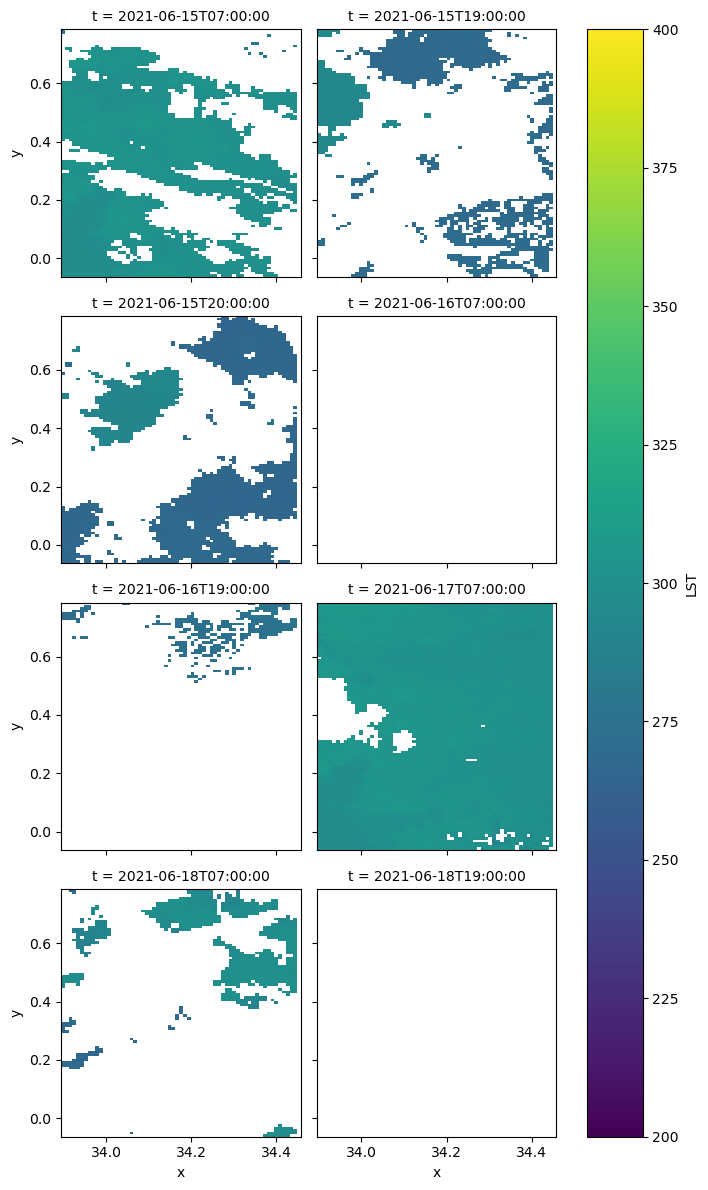

In [7]:
ds = xr.load_dataset("LST-busia.nc")
ds["LST"].plot.imshow(col="t", col_wrap=2, vmin=200, vmax=400)

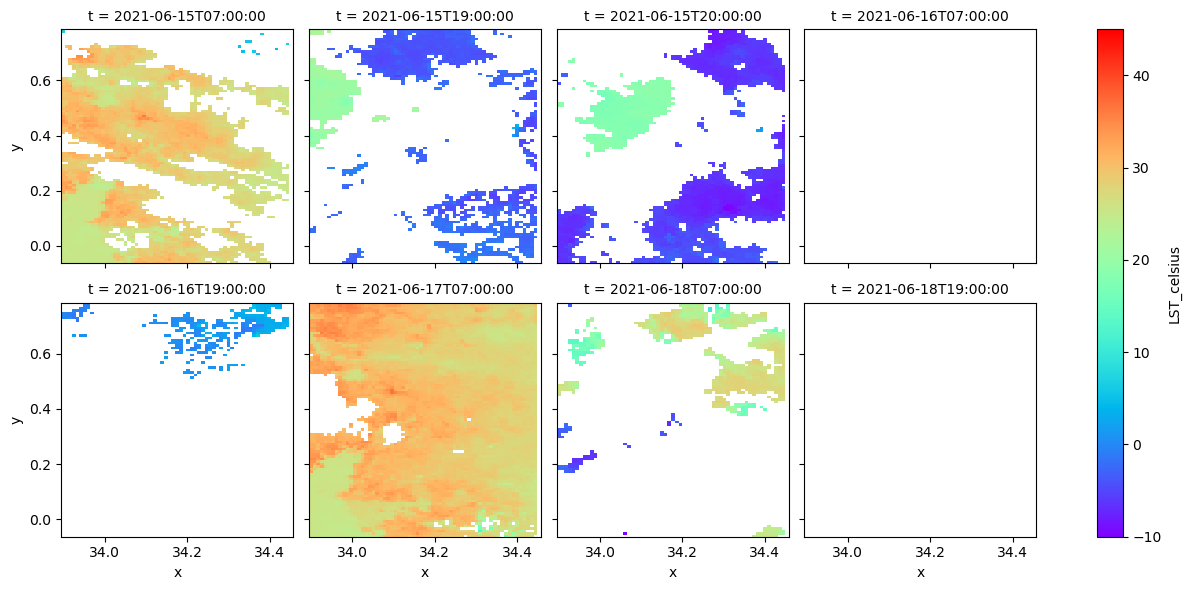

In [8]:
ds["LST_celsius"] = ds["LST"] - 273.15

# Plot the LST in Celsius with a rainbow colormap
img_c = ds["LST_celsius"].plot.imshow(col="t", col_wrap=4, vmin=-10, vmax=45, cmap='rainbow')
plt.show()

In [9]:
job = sentinel3_cube.create_job(out_format="GTiff")

In [10]:
job.start_and_wait()
job.get_results()

0:00:00 Job 'j-24052283b368445a859f37fed32c9514': send 'start'
0:00:22 Job 'j-24052283b368445a859f37fed32c9514': created (progress 0%)
0:00:42 Job 'j-24052283b368445a859f37fed32c9514': queued (progress 0%)
0:00:51 Job 'j-24052283b368445a859f37fed32c9514': queued (progress 0%)
0:01:00 Job 'j-24052283b368445a859f37fed32c9514': queued (progress 0%)
0:01:19 Job 'j-24052283b368445a859f37fed32c9514': queued (progress 0%)
0:01:33 Job 'j-24052283b368445a859f37fed32c9514': queued (progress 0%)
0:01:51 Job 'j-24052283b368445a859f37fed32c9514': queued (progress 0%)
0:02:19 Job 'j-24052283b368445a859f37fed32c9514': queued (progress 0%)
0:02:52 Job 'j-24052283b368445a859f37fed32c9514': queued (progress 0%)
0:03:22 Job 'j-24052283b368445a859f37fed32c9514': queued (progress 0%)
0:03:59 Job 'j-24052283b368445a859f37fed32c9514': queued (progress 0%)
0:04:47 Job 'j-24052283b368445a859f37fed32c9514': queued (progress 0%)
0:05:50 Job 'j-24052283b368445a859f37fed32c9514': queued (progress 0%)
0:06:51 Job '

<JobResults for job 'j-24052283b368445a859f37fed32c9514'>